In [99]:
import datetime
import pathlib
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [100]:
warnings.filterwarnings('ignore')
data_dir = pathlib.Path('data').resolve()
csv = {
    'relay_users': 'relay_users.csv',
    'bridge_users_by_country': 'bridge_users_by_country.csv',
    'top_10_countries_by_censorship_events': 'top_10_countries_by_censorship_events.csv',
    'relays_and_bridges': 'relays_and_bridges.csv',
    'relays_by_tor_versions': 'relays_by_tor_versions.csv',
    'relays_by_platform': 'relays_by_platform.csv',
    'total_bandwidth': 'total_bandwidth.csv',
    'ad_cs_bandwidth': 'ad_cs_bandwidth.csv',
    'bandwidth_by_ip_version': 'bandwidth_by_ip_version.csv',
    'tor_downloads': 'tor_downloads.csv',
    'tor_download_timeouts_and_failures': 'tor_download_timeouts_and_failures.csv',
    'circuit_build_times': 'circuit_build_times.csv',
    'circuit_latency': 'circuit_latency.csv',
    'throughput': 'throughput.csv',
    'all_versions_traffic': 'all_versions_traffic.csv',
    'v2_traffic': 'v2_traffic.csv',
    'v3_traffic': 'v3_traffic.csv',
    'tor_browser_updates_and_downloads': 'tor_browser_updates_and_downloads.csv',
    'tor_browser_upd_and_dl_by_platform': 'tor_browser_upd_and_dl_by_platform.csv'
}

In [3]:
def aggregated(**kwargs):
    df = pd.read_csv(data_dir / csv.get(kwargs.get('source')))
    if 'na_substitutions' in kwargs:
        df = df.fillna(value=kwargs.get('na_substitutions'))
    if 'types' in kwargs:
        for column, dtype in kwargs.get('types').items():
            df[column] = df[column].astype(dtype)
    if 'transforms' in kwargs:
        for column, transform in kwargs.get('transforms').items():
            df[column] = df[column].apply(transform)
    
    df = df.groupby(kwargs.get('by')).aggregate(kwargs.get('agg')).reset_index()
    
    return df

In [4]:
def plot(**kwargs):
    fig, ax = plt.subplots(1, 1, figsize=(16, 9), constrained_layout=True)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.grid(True)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    if 'title' in kwargs:
        plt.title(kwargs['title'])
    if 'xlabel' in kwargs:
        ax.set_ylabel(kwargs['xlabel'])
    if 'ylabel' in kwargs:
        ax.set_ylabel(kwargs['ylabel'])
    
    data, x, y = kwargs.get('data'), kwargs.get('x'), kwargs.get('y')
    if isinstance(y, str):
        y = {y: y}
    for key, value in y.items():
        if 'countries' in kwargs:
            for country in kwargs.get('countries'):
                ax.plot(x, value, data=data[data['country'] == country], label=country)
        elif 'by' in kwargs:
            for catg in data[kwargs['by']].unique():
                ax.plot(x, value, data=data[data[kwargs['by']] == catg], label=str(catg))
        else:
            ax.plot(x, value, data=data, label=key)
    if 'by' in kwargs or len(y) > 1:
        ax.legend()
    if 'path' in kwargs:
        plt.savefig(kwargs['path'], bbox_inches='tight')
    plt.show()

In [87]:
def scatter(**kwargs):
    fig, ax = plt.subplots(1, 1, figsize=(16, 9), constrained_layout=True)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.grid(True)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    if 'title' in kwargs:
        plt.title(kwargs['title'])
    if 'xlabel' in kwargs:
        ax.set_ylabel(kwargs['xlabel'])
    if 'ylabel' in kwargs:
        ax.set_ylabel(kwargs['ylabel'])
    
    df, x, y, c = kwargs.get('df'), kwargs.get('x'), kwargs.get('y'), kwargs.get('c')

    cmap = plt.cm.get_cmap('jet')
    clusters = df.groupby(c)
    i = 0
    for catg, cluster in clusters:
        ax.scatter(cluster[x], cluster[y], color=cmap(i/len(clusters)), label=catg, alpha=kwargs.get('alpha', 1), edgecolors='none')
        i += 1
    ax.legend()
    if 'path' in kwargs:
        plt.savefig(kwargs['path'], bbox_inches='tight')
    plt.show()

In [6]:
def bar(**kwargs):
    fig, ax = plt.subplots(1, 1, figsize=(16, 9), constrained_layout=True)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.grid(True)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    if 'xlabel' in kwargs:
        ax.set_ylabel(kwargs.get('xlabel'))
    if 'ylabel' in kwargs:
        ax.set_ylabel(kwargs.get('ylabel'))
    
    data = kwargs.get('data')
    x = kwargs.get('x')
    y = kwargs.get('y')
    ax.plot(x, y, data=data[data['country'] == 'all'])
    if 'countries' in kwargs:
        for country in kwargs.get('countries'):
            ax.plot(x, y, data=data[data['country'] == country])
    if 'path' in kwargs:
        plt.savefig(kwargs['path'], bbox_inches='tight')
    plt.show()

In [7]:
dataframes = {}

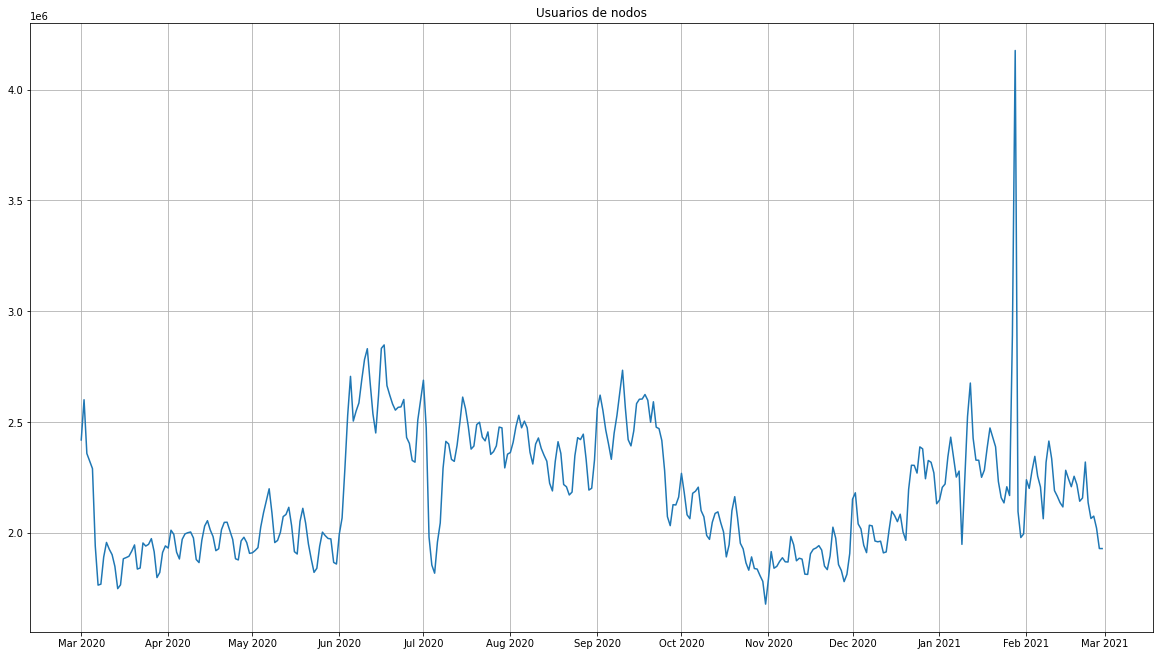

In [8]:
source = 'relay_users'
kwargs = {
    'source': source,
    'na_substitutions': {
        'country': 'all'
    },
    'types': {
        'date': 'M',
        'country': 'category'
    },
    'by': ['date', 'country'],
    'agg': np.sum
}
dataframes[source] = aggregated(**kwargs)
plot(data=dataframes[source], x='date', y='users', title='Usuarios de nodos', countries=['all'], path=f'plots/{source}.png')

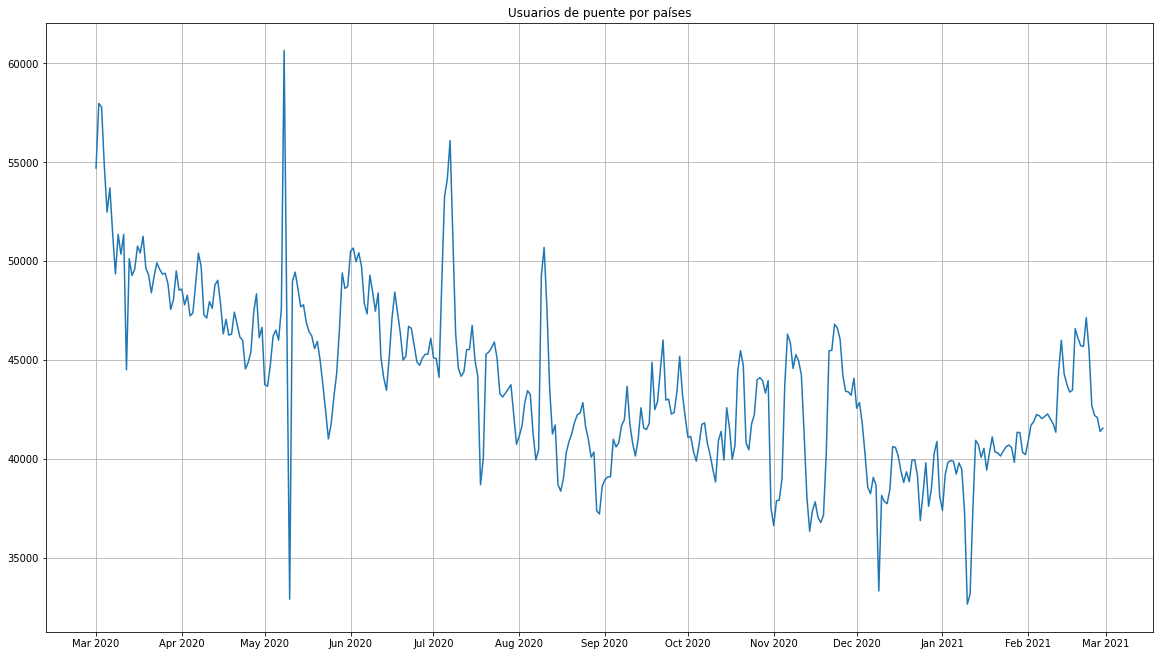

In [9]:
source = 'bridge_users_by_country'
kwargs = {
    'source': source,
    'na_substitutions': {
        'country': 'all'
    },
    'types': {
        'date': 'M',
        'country': 'category'
    },
    'by': ['date', 'country'],
    'agg': np.sum
}
dataframes[source] = aggregated(**kwargs)
plot(data=dataframes[source], x='date', y='users', title='Usuarios de puente por países', countries=['all'], path=f'plots/{source}.png')

In [10]:
source = 'top_10_countries_by_censorship_events'
dataframes[source] = pd.read_csv(data_dir / csv.get(source))
dataframes[source]['Country'] = dataframes[source]['Country'].astype('category')

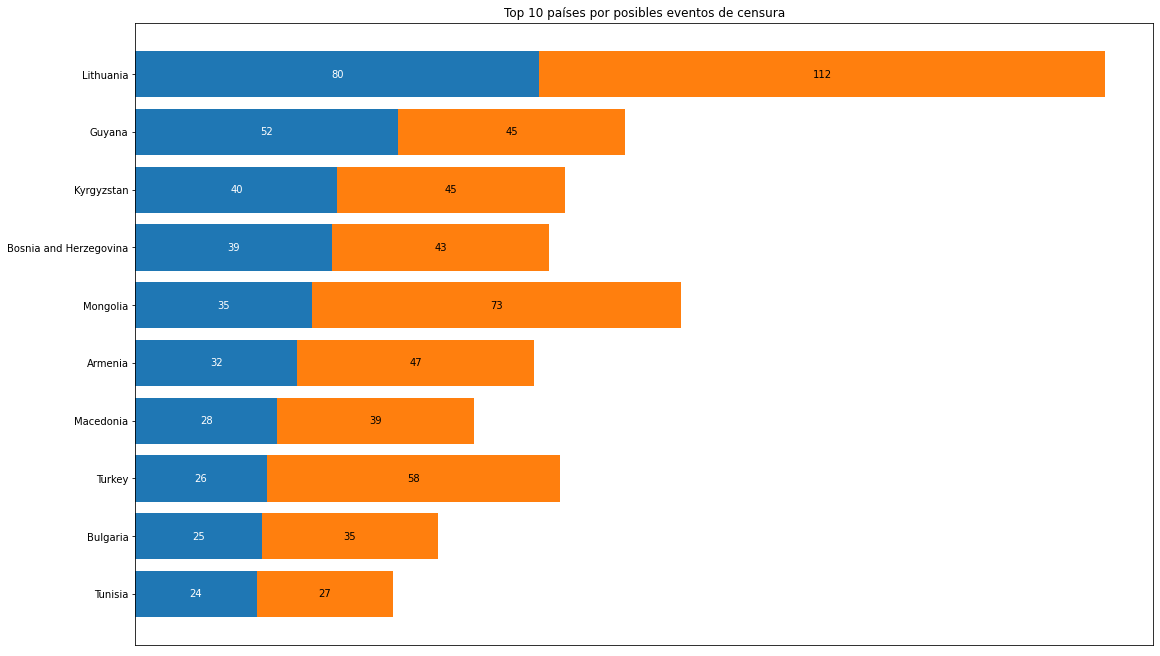

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(16, 9), constrained_layout=True)
#category_colors = plt.colormaps['RdYlGn'](np.linspace(0.15, 0.85, data.))
ax.invert_yaxis()
ax.xaxis.set_visible(False)
rects = ax.barh(dataframes[source]['Country'], dataframes[source]['Downturns'])
ax.bar_label(rects, label_type='center', color='white')
rects = ax.barh(dataframes[source]['Country'], dataframes[source]['Upturns'], left=dataframes[source]['Downturns'])
ax.bar_label(rects, label_type='center', color='black')
plt.title('Top 10 países por posibles eventos de censura')
#ax.legend(ncol=2, bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')
plt.savefig(f'plots/{source}.png', bbox_inches='tight')
plt.show()

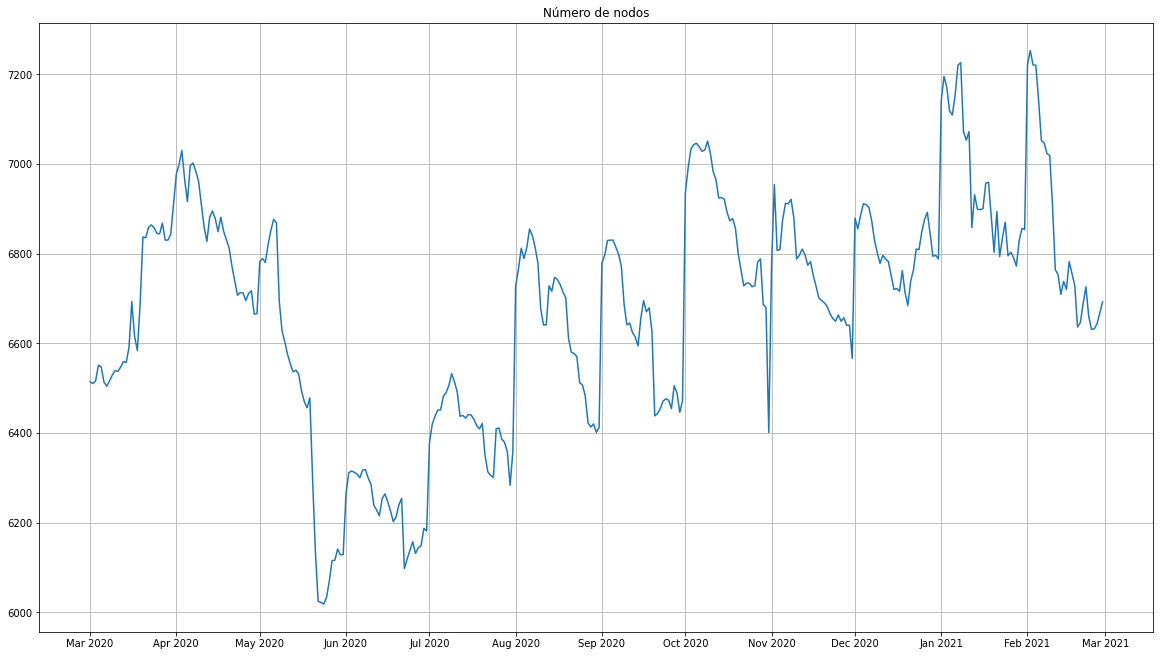

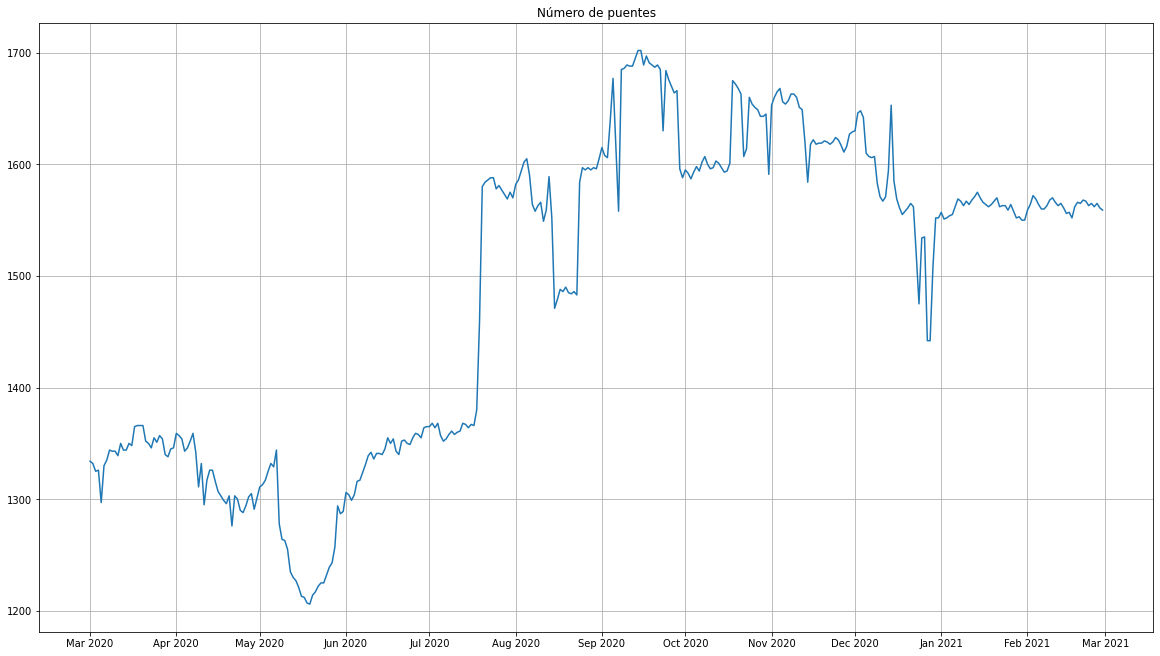

In [12]:
source = 'relays_and_bridges'
dataframes[source] = pd.read_csv(data_dir / csv.get(source))
dataframes[source]['date'] = dataframes[source]['date'].astype('M')
plot(data=dataframes[source], x='date', y='relays', title='Número de nodos', path=f'plots/relays.png')
plot(data=dataframes[source], x='date', y='bridges', title='Número de puentes', path=f'plots/bridges.png')

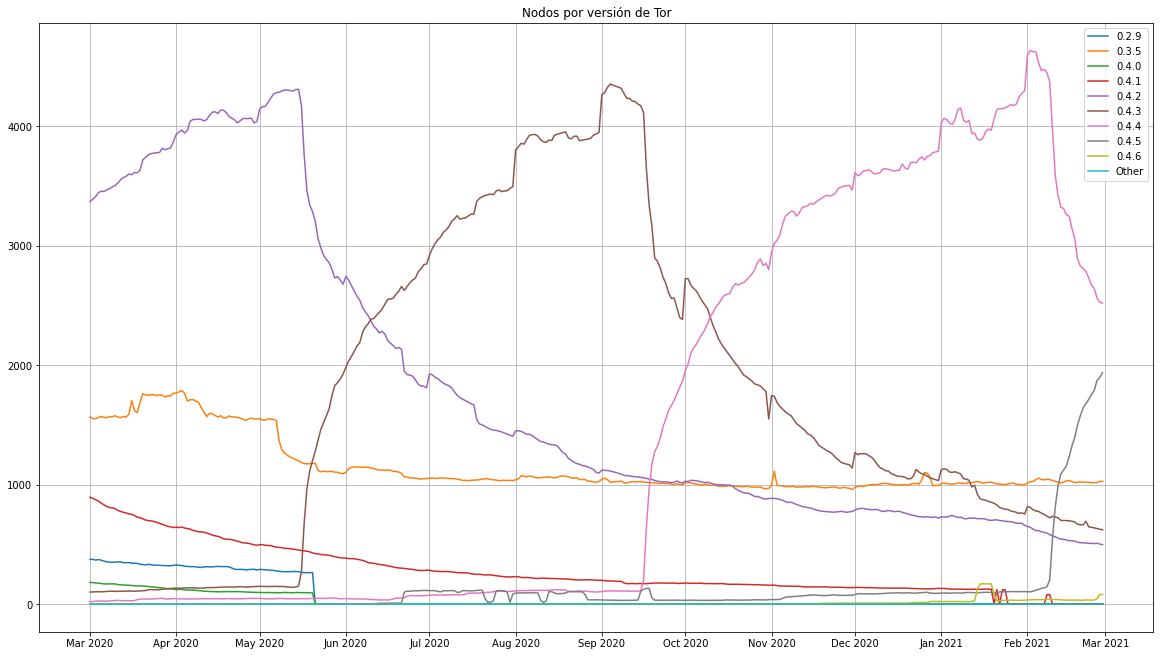

In [13]:
source = 'relays_by_tor_versions'
kwargs = {
    'source': source,
    'types': {
        'date': 'M',
        'version': 'category'
    },
    'by': ['date', 'version'],
    'agg': np.sum
}
dataframes[source] = aggregated(**kwargs)
plot(data=dataframes[source], x='date', y='relays', by='version', title='Nodos por versión de Tor', path=f'plots/{source}.png')

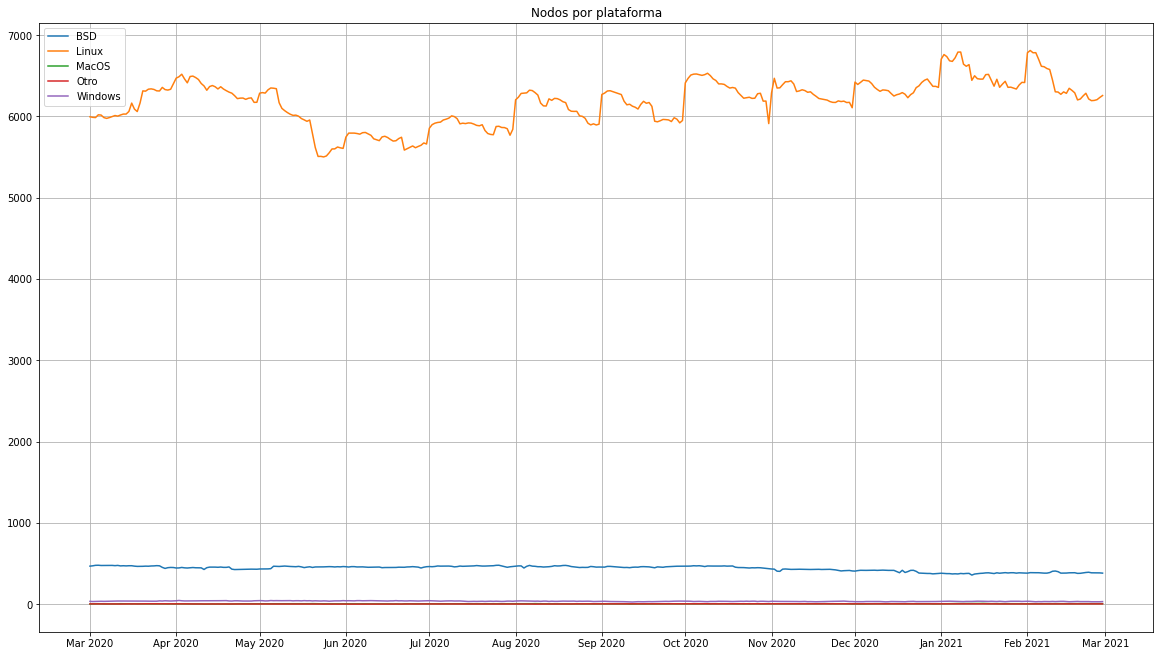

In [14]:
source = 'relays_by_platform'
dataframes[source] = pd.read_csv(data_dir / csv.get(source))
dataframes[source]['date'] = dataframes[source]['date'].astype('M')
y = {'BSD': 'bsd', 'Linux': 'linux', 'MacOS': 'macos', 'Otro': 'other', 'Windows': 'windows'}
plot(data=dataframes[source], x='date', y=y, title='Nodos por plataforma', path=f'plots/{source}.png')

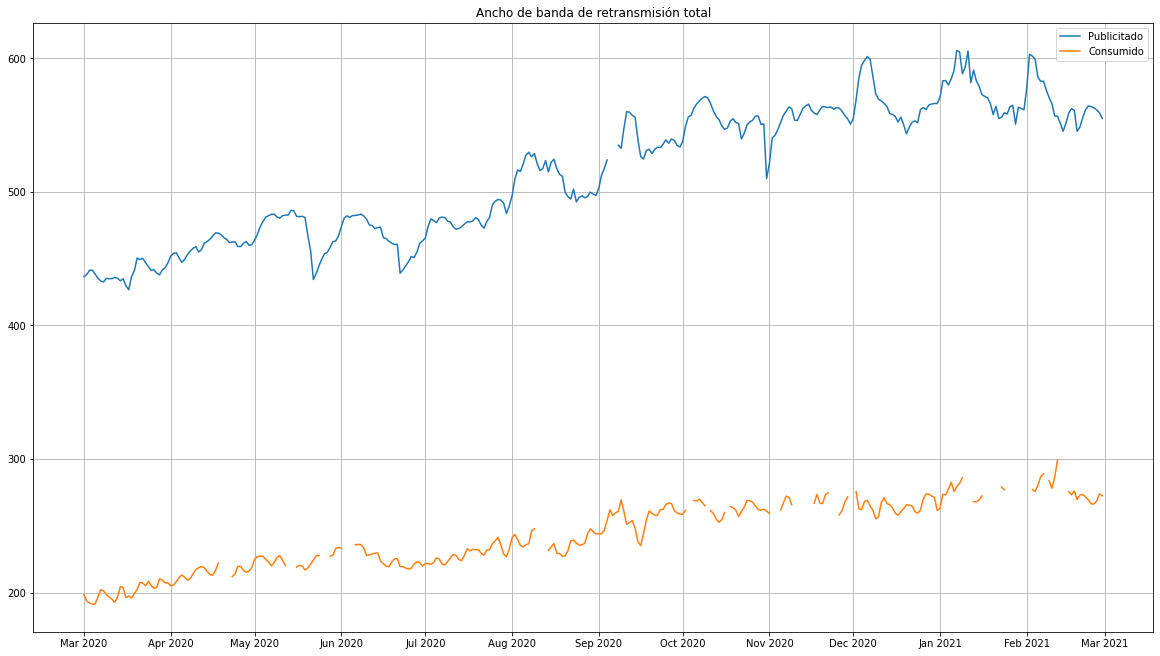

In [15]:
source = 'total_bandwidth'
dataframes[source] = pd.read_csv(data_dir / csv.get(source))
dataframes[source]['date'] = dataframes[source]['date'].astype('M')
y = {'Publicitado': 'advbw', 'Consumido': 'bwhist'}
plot(data=dataframes[source], x='date', y=y, title='Ancho de banda de retransmisión total', path=f'plots/{source}.png')

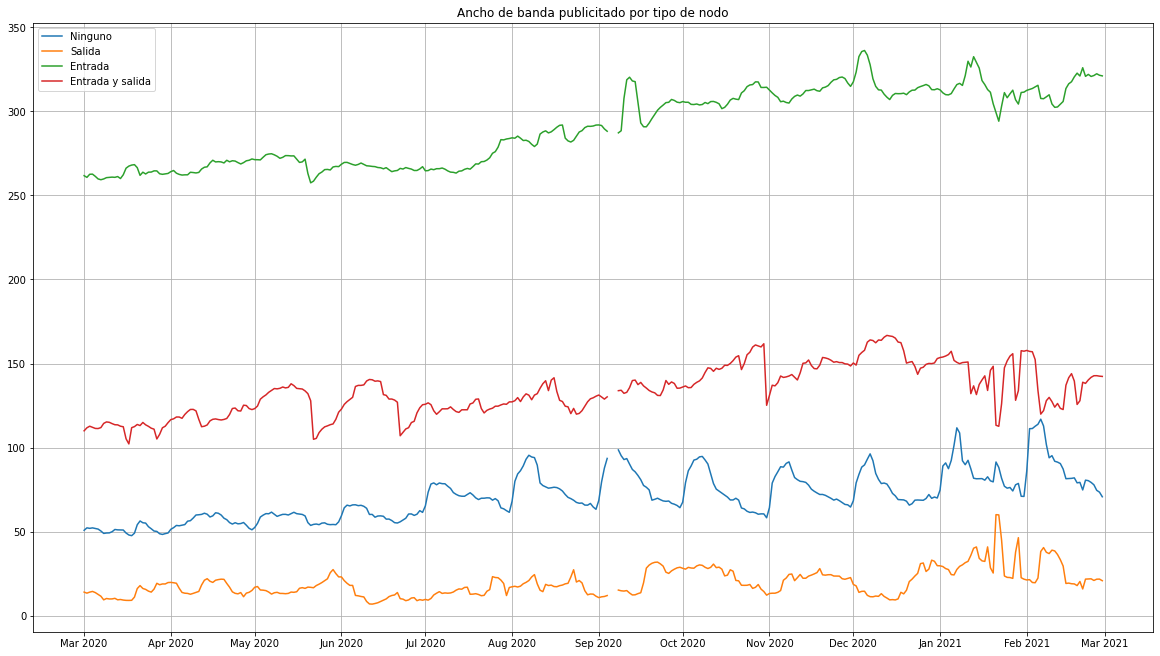

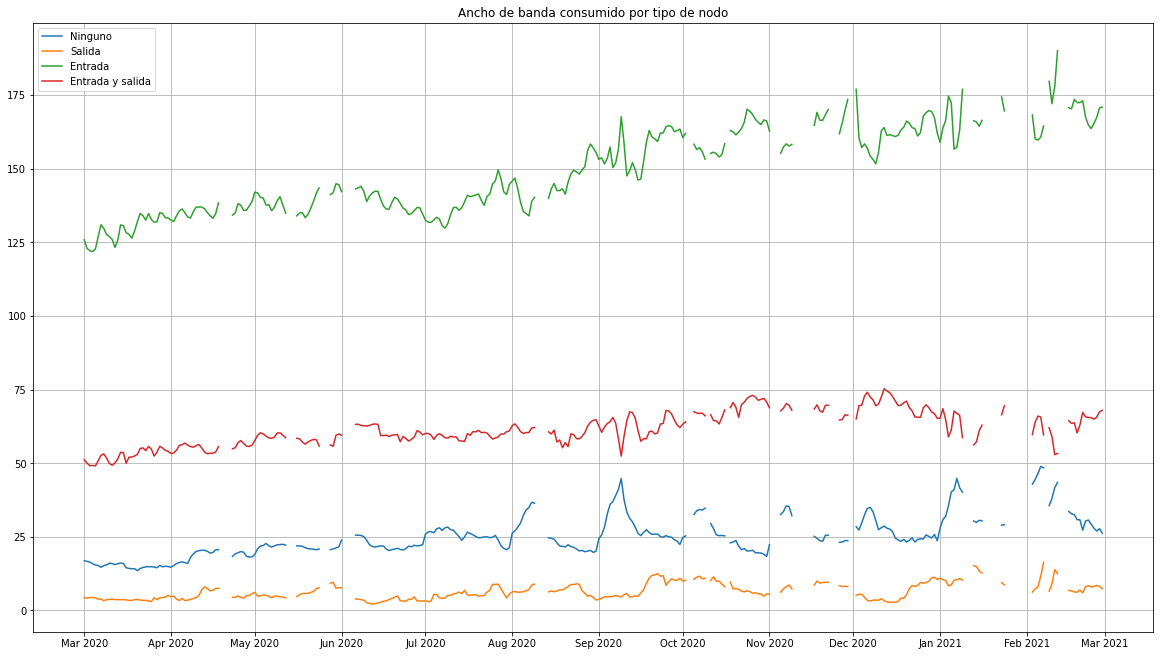

In [16]:
def node_type(row):
    if row.have_guard_flag:
        result = 'Entrada y salida' if row.have_exit_flag else 'Entrada'
    elif row.have_exit_flag:
        result = 'Salida'
    else:
        result = 'Ninguno'
    return result


source = 'ad_cs_bandwidth'
dataframes[source] = pd.read_csv(data_dir / csv.get(source))
dataframes[source]['date'] = dataframes[source]['date'].astype('M')
dataframes[source]['type'] = dataframes[source].apply(node_type, axis=1).astype('category')
plot(data=dataframes[source], x='date', y='advbw', by='type', title='Ancho de banda publicitado por tipo de nodo', path=f'plots/advertised_bandwidth_by_node_type.png')
plot(data=dataframes[source], x='date', y='bwhist', by='type', title='Ancho de banda consumido por tipo de nodo', path=f'plots/consumed_bandwidth_by_node_type.png')

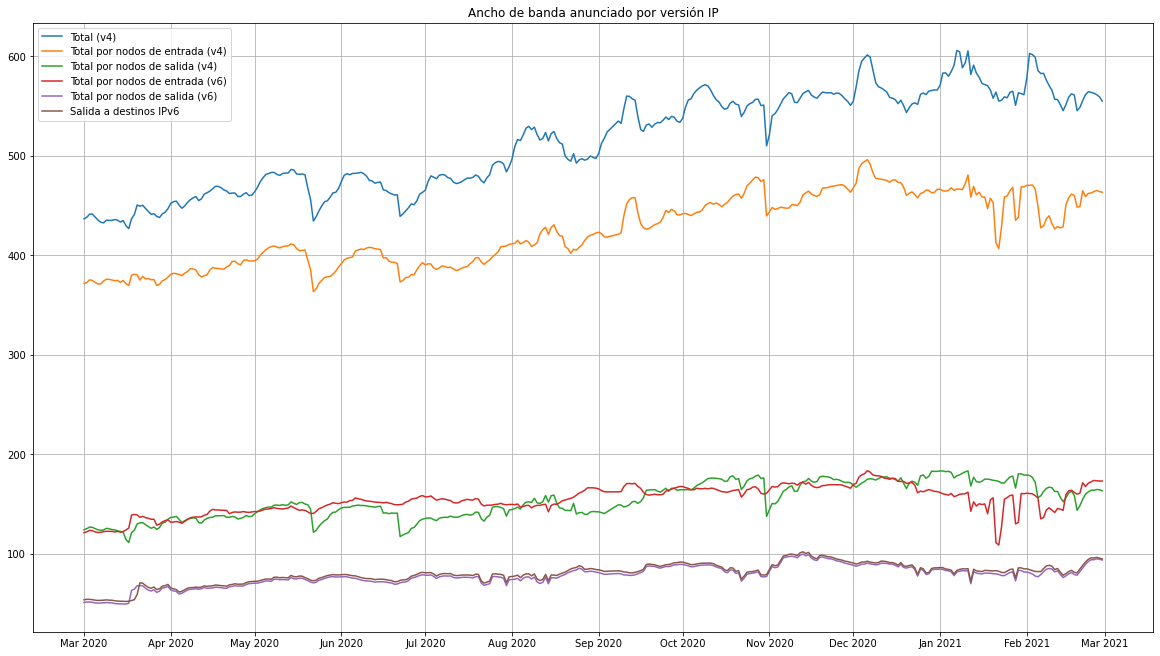

In [17]:
source = 'bandwidth_by_ip_version'
dataframes[source] = pd.read_csv(data_dir / csv.get(source))
dataframes[source]['date'] = dataframes[source]['date'].astype('M')
y = {
    'Total (v4)': 'total',
    'Total por nodos de entrada (v4)': 'total_guard',
    'Total por nodos de salida (v4)': 'total_exit',
    'Total por nodos de entrada (v6)': 'reachable_guard',
    'Total por nodos de salida (v6)':'reachable_exit',
    'Salida a destinos IPv6': 'exiting'
}
plot(data=dataframes[source], x='date', y=y, title='Ancho de banda anunciado por versión IP', path=f'plots/{source}.png')

/tmp/ipykernel_1420/509019151.py:23: RuntimeWarning: Second argument 'md' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  ax.plot(x, value, data=data[data[kwargs['by']] == catg], label=str(catg))
/tmp/ipykernel_1420/509019151.py:23: RuntimeWarning: Second argument 'md' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  ax.plot(x, value, data=data[data[kwargs['by']] == catg], label=str(catg))


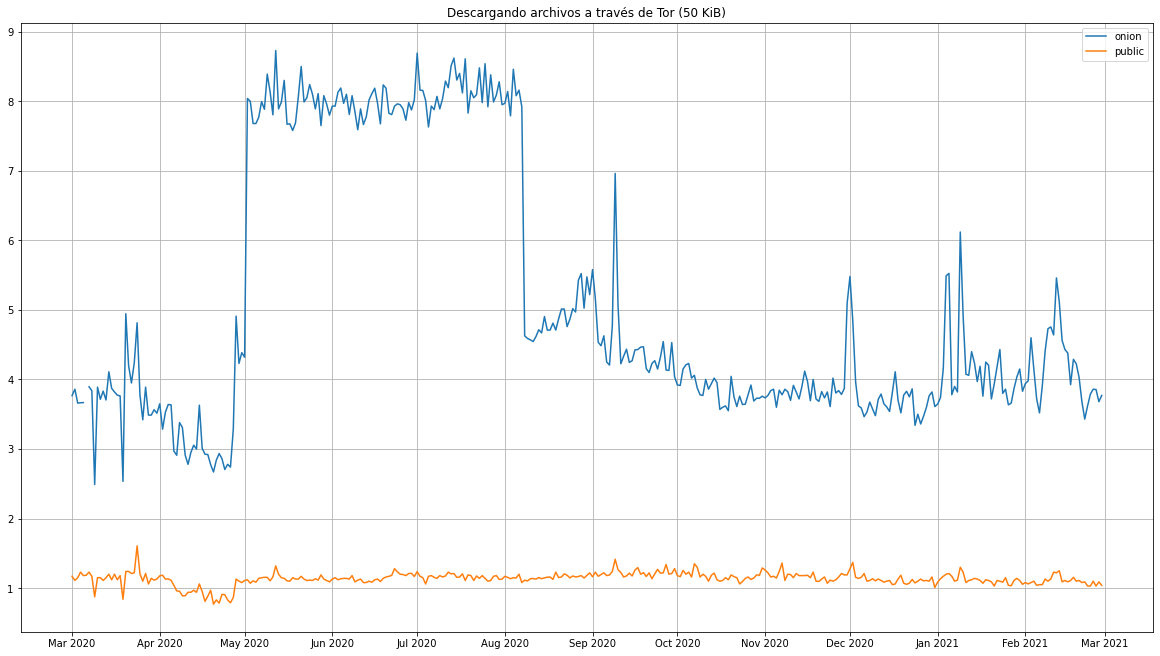

/tmp/ipykernel_1420/509019151.py:23: RuntimeWarning: Second argument 'md' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  ax.plot(x, value, data=data[data[kwargs['by']] == catg], label=str(catg))
/tmp/ipykernel_1420/509019151.py:23: RuntimeWarning: Second argument 'md' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  ax.plot(x, value, data=data[data[kwargs['by']] == catg], label=str(catg))


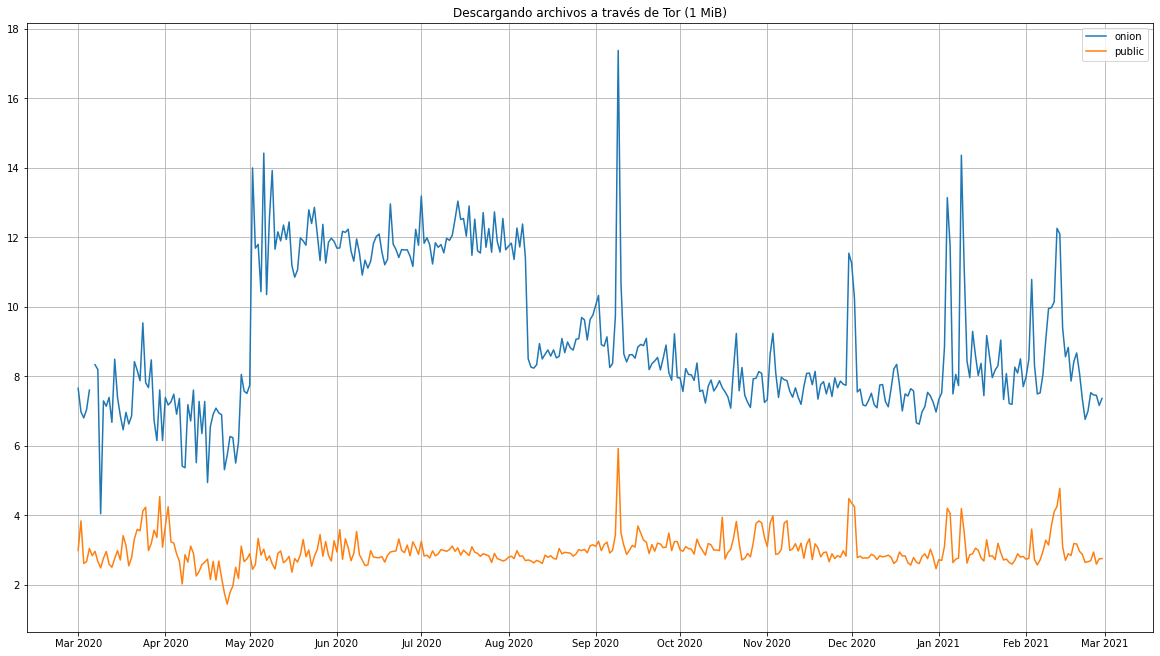

/tmp/ipykernel_1420/509019151.py:23: RuntimeWarning: Second argument 'md' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  ax.plot(x, value, data=data[data[kwargs['by']] == catg], label=str(catg))
/tmp/ipykernel_1420/509019151.py:23: RuntimeWarning: Second argument 'md' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  ax.plot(x, value, data=data[data[kwargs['by']] == catg], label=str(catg))


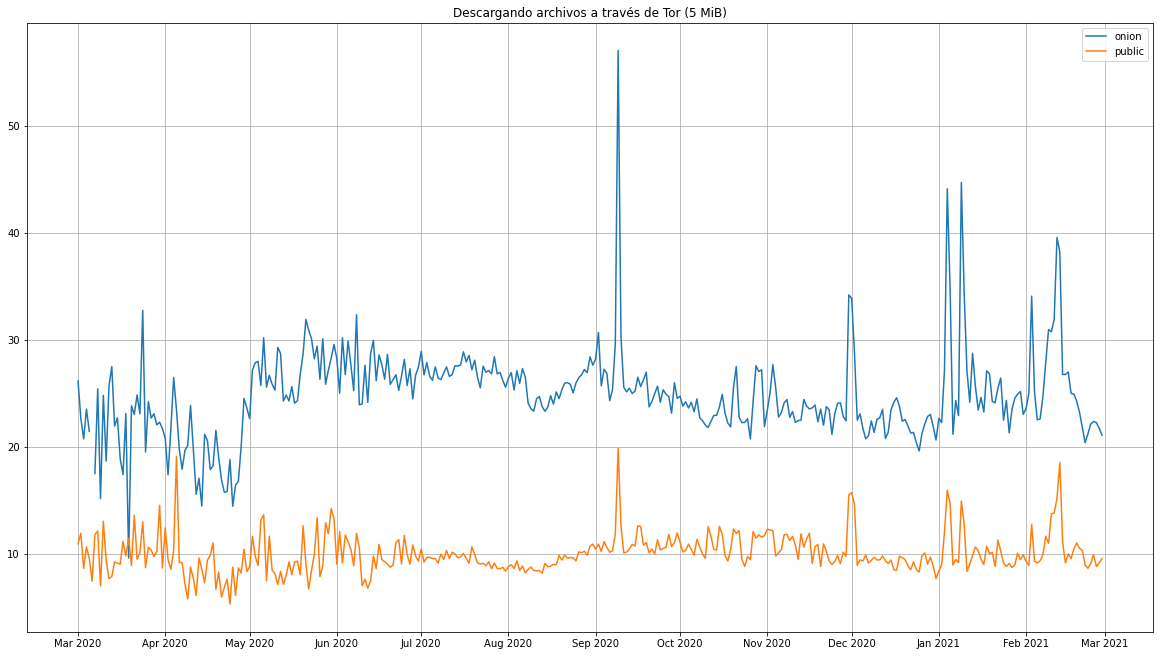

In [18]:
source = 'tor_downloads'
kwargs = {
    'source': source,
    'types': {
        'date': 'M',
        'filesize': 'category',
        'source': 'category',
        'server': 'category'
    },
    'by': ['date', 'filesize', 'server'],
    'agg': np.median
}
dataframes[source] = aggregated(**kwargs)
categories = [
    {'filesize': 51200, 'name': '50 KiB', 'path': f'plots/{source}_50KiB.png'},
    {'filesize': 1048576, 'name': '1 MiB', 'path': f'plots/{source}_1MiB.png'},
    {'filesize': 5242880, 'name': '5 MiB', 'path': f'plots/{source}_5MiB.png'},
]
for catg in categories:
    plot(
        data=dataframes[source][dataframes[source]['filesize'] == catg['filesize']],
        x='date', y='md', by='server',
        title=f'Descargando archivos a través de Tor ({catg["name"]})', path=catg['path'])

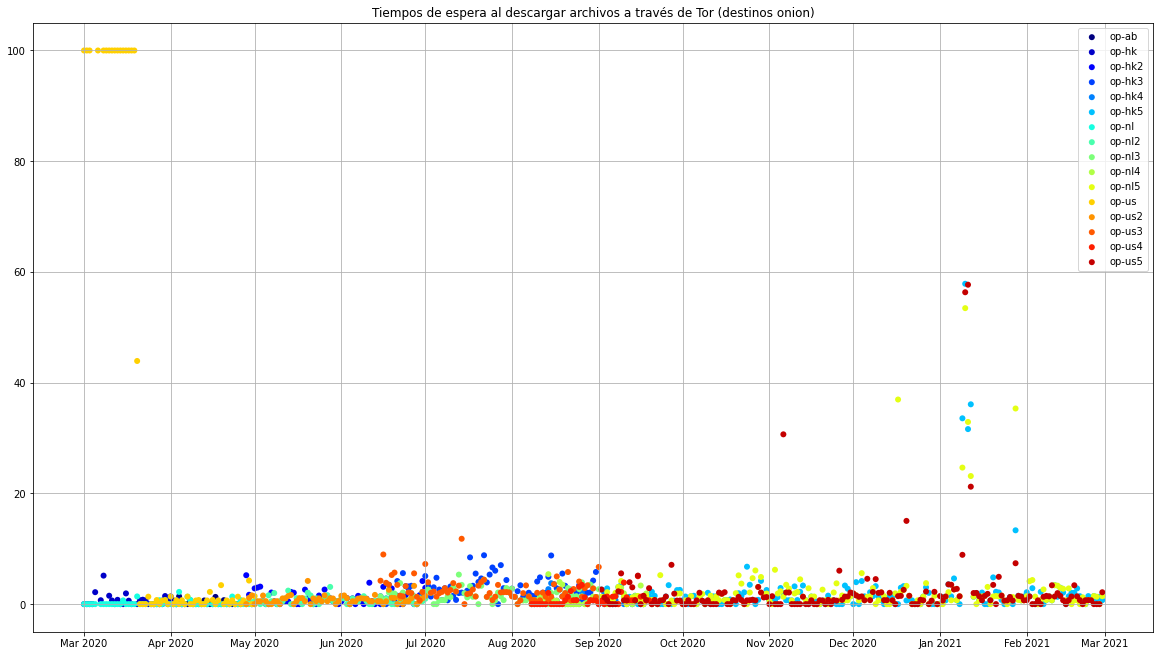

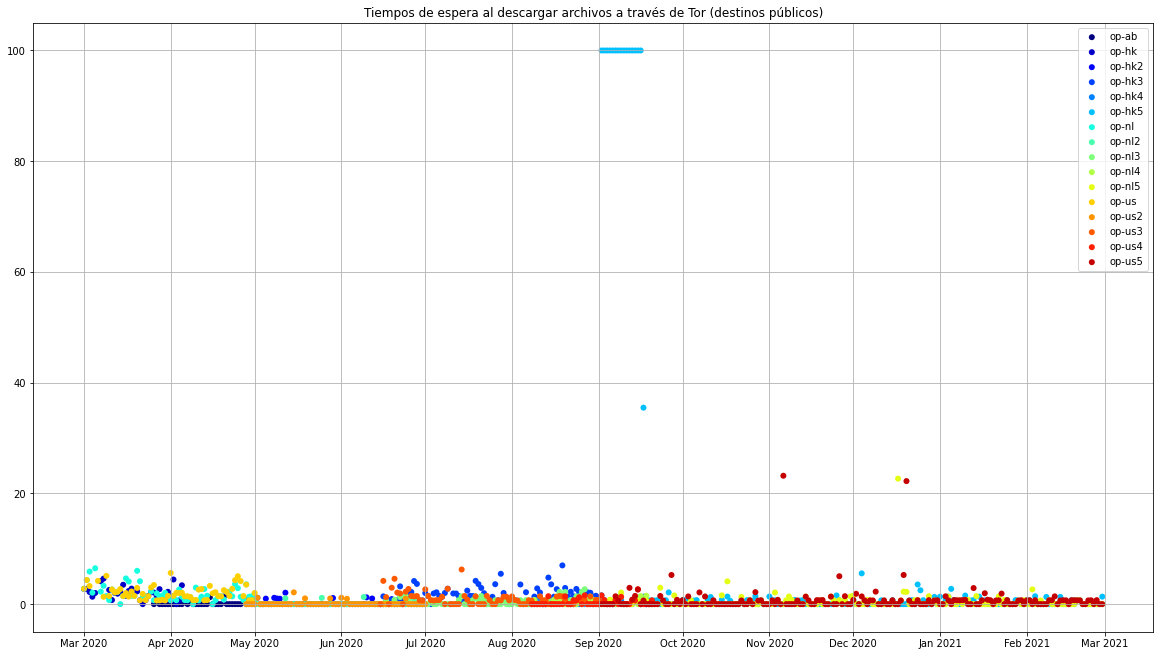

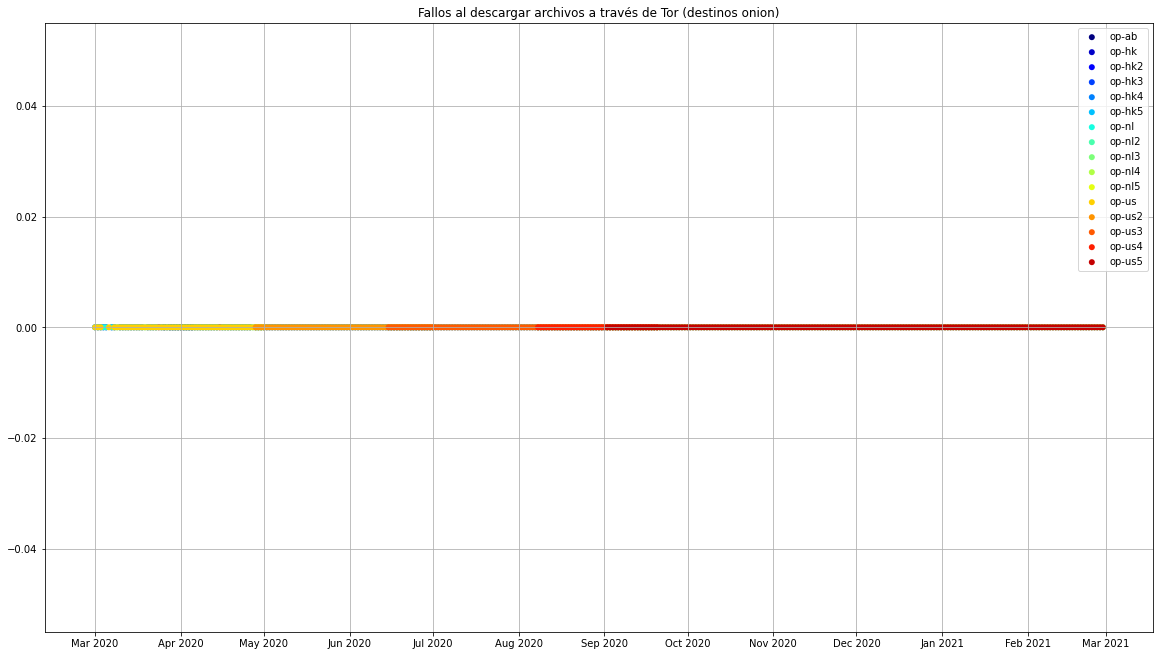

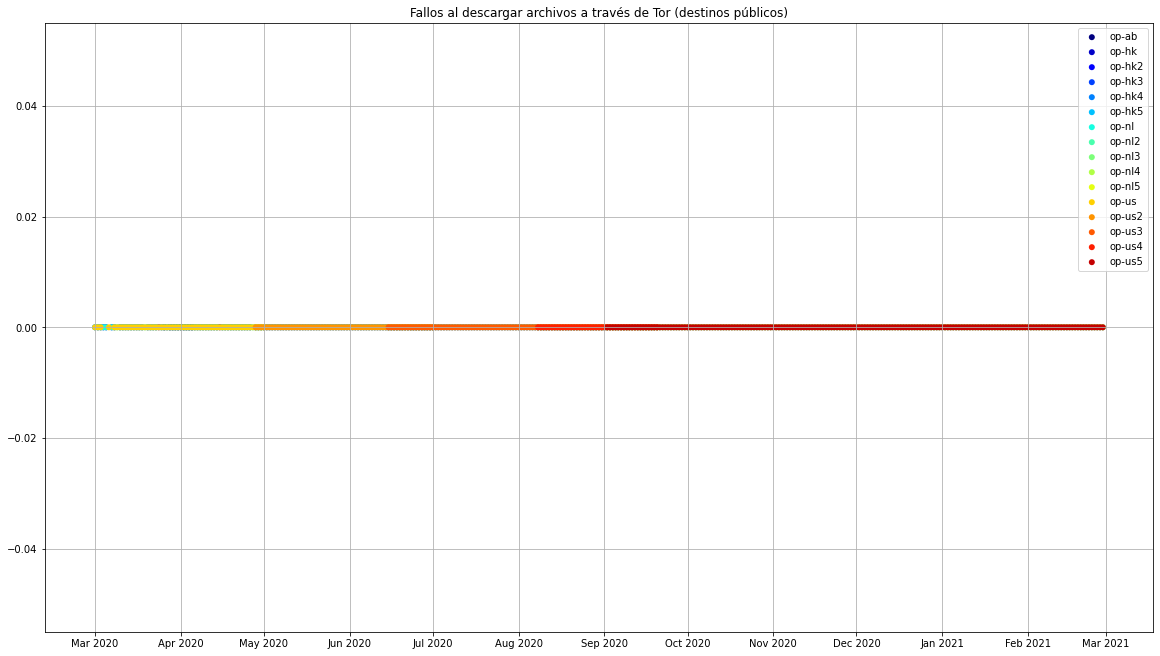

In [91]:
source = 'tor_download_timeouts_and_failures'
dataframes[source] = pd.read_csv(data_dir / csv.get(source))
df = dataframes[source]
df['date'] = df['date'].astype('M')
df['source'] = df['source'].astype('category')
df['server'] = df['server'].astype('category')
df['timeouts'] = df['timeouts'].apply(lambda x: 100*x)
df['failures'] = df['failures'].apply(lambda x: 100*x)

scatter(df=df[df.server == 'onion'], x='date', y='timeouts', c='source', title='Tiempos de espera al descargar archivos a través de Tor (destinos onion)', path=f'plots/tor_download_timeouts_onion.png')
scatter(df=df[df.server == 'public'], x='date', y='timeouts', c='source', title='Tiempos de espera al descargar archivos a través de Tor (destinos públicos)', path=f'plots/tor_download_timeouts_public.png')
scatter(df=df[df.server == 'onion'], x='date', y='failures', c='source', title='Fallos al descargar archivos a través de Tor (destinos onion)', path=f'plots/tor_download_failures_onion.png')
scatter(df=df[df.server == 'public'], x='date', y='failures', c='source', title='Fallos al descargar archivos a través de Tor (destinos públicos)', path=f'plots/tor_download_failures_public.png')

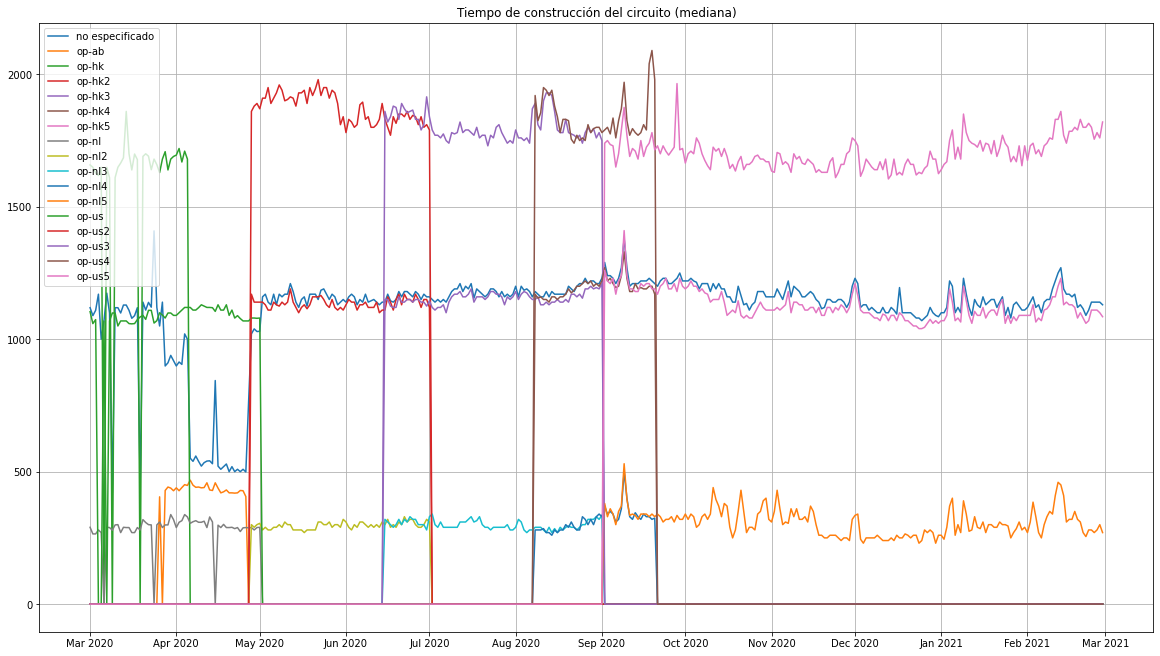

In [102]:
source = 'circuit_build_times'
kwargs = {
    'source': source,
    'na_substitutions': {
        'source': 'no especificado'
    },
    'types': {
        'date': 'M',
        'source': 'category',
        'position': 'category'
    },
    'by': ['date', 'source'],
    'agg': np.sum
}
dataframes[source] = aggregated(**kwargs)
plot(data=dataframes[source], x='date', y='md', by='source', title='Tiempo de construcción del circuito (mediana)', path=f'plots/{source}.png')

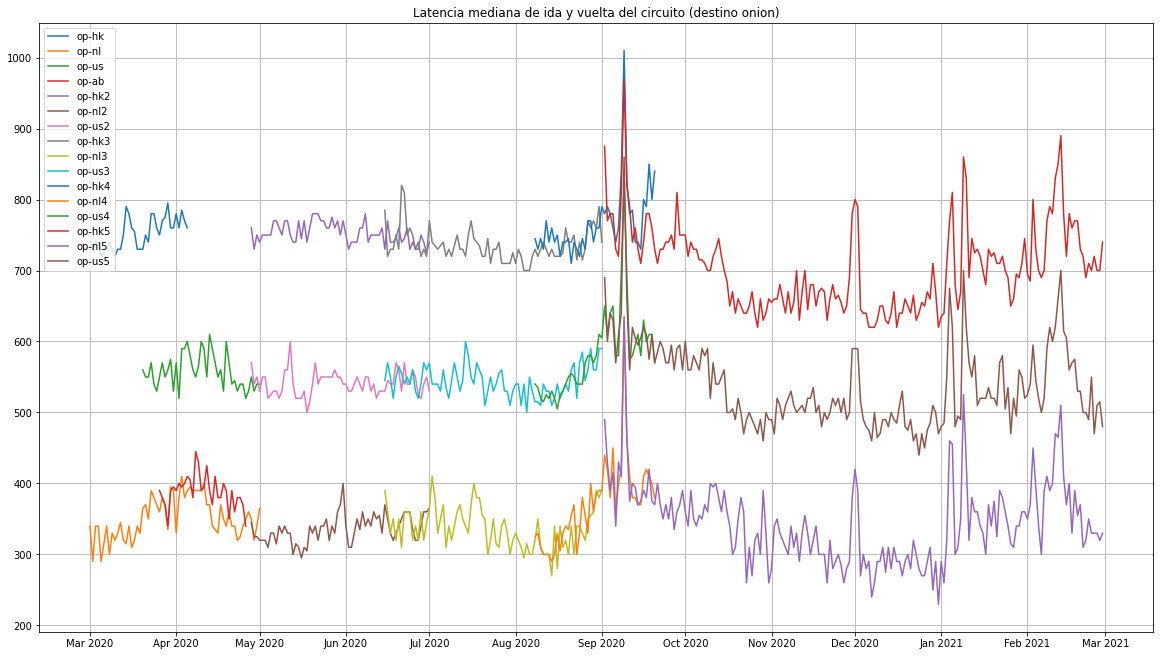

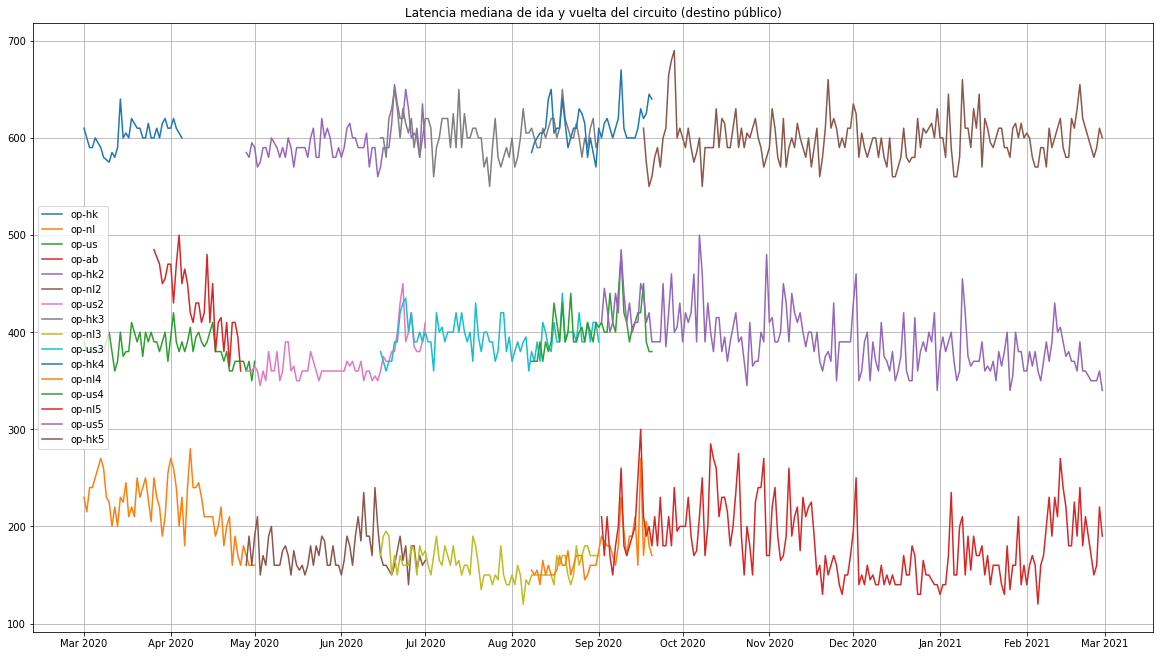

In [103]:
source = 'circuit_latency'
dataframes[source] = pd.read_csv(data_dir / csv.get(source))
df = dataframes[source]

df['date'] = df['date'].astype('M')
df['source'] = df['source'].astype('category')
df['server'] = df['server'].astype('category')


plot(data=df[df['server'] == 'onion'], x='date', y='md', by='source', title='Latencia mediana de ida y vuelta del circuito (destino onion)', path=f'plots/{source}_onion.png')
plot(data=df[df['server'] == 'public'], x='date', y='md', by='source', title='Latencia mediana de ida y vuelta del circuito (destino público)', path=f'plots/{source}_public.png')

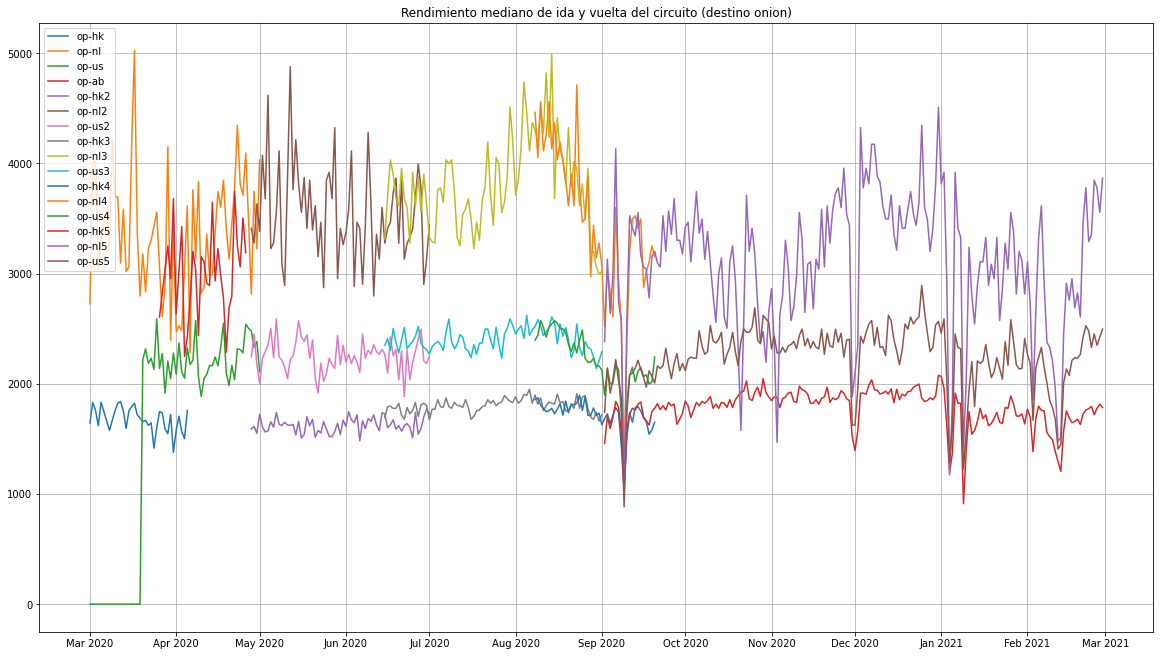

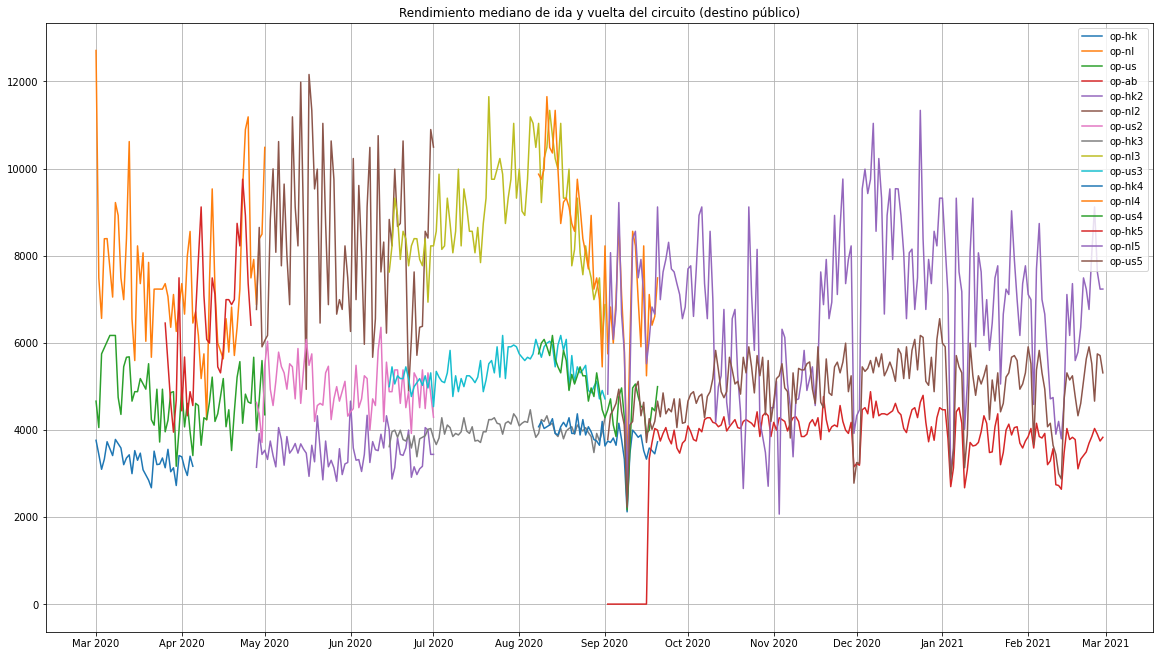

In [104]:
source = 'throughput'
dataframes[source] = pd.read_csv(data_dir / csv.get(source))
df = dataframes[source]

df['date'] = df['date'].astype('M')
df['source'] = df['source'].astype('category')
df['server'] = df['server'].astype('category')


plot(data=df[df['server'] == 'onion'], x='date', y='md', by='source', title='Rendimiento mediano de ida y vuelta del circuito (destino onion)', path=f'plots/{source}_onion.png')
plot(data=df[df['server'] == 'public'], x='date', y='md', by='source', title='Rendimiento mediano de ida y vuelta del circuito (destino público)', path=f'plots/{source}_public.png')

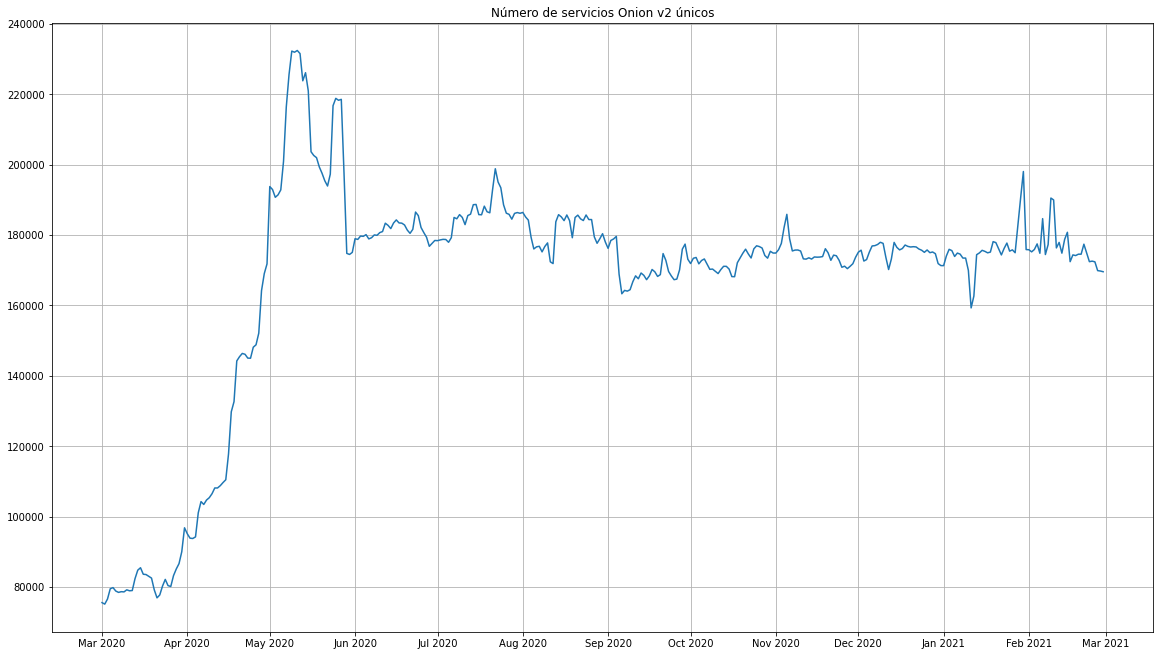

In [106]:
source = 'v2_traffic'
dataframes[source] = pd.read_csv(data_dir / csv.get(source))
df = dataframes[source]

df['date'] = df['date'].astype('M')

plot(data=df, x='date', y='onions', title='Número de servicios Onion v2 únicos', path=f'plots/{source}.png')

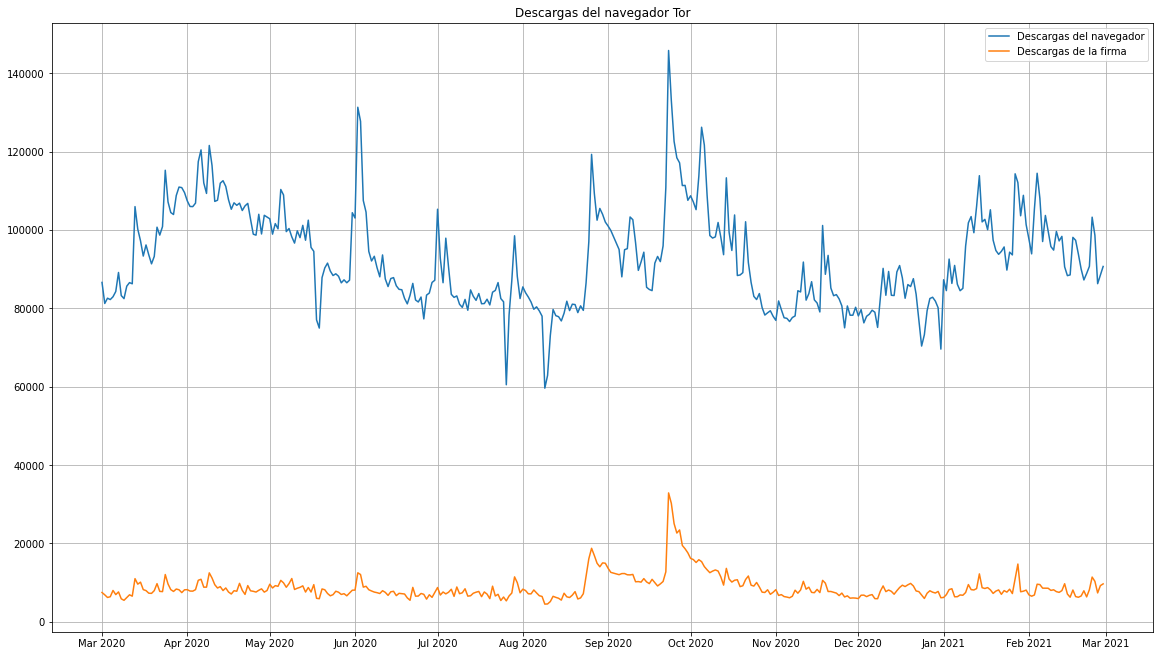

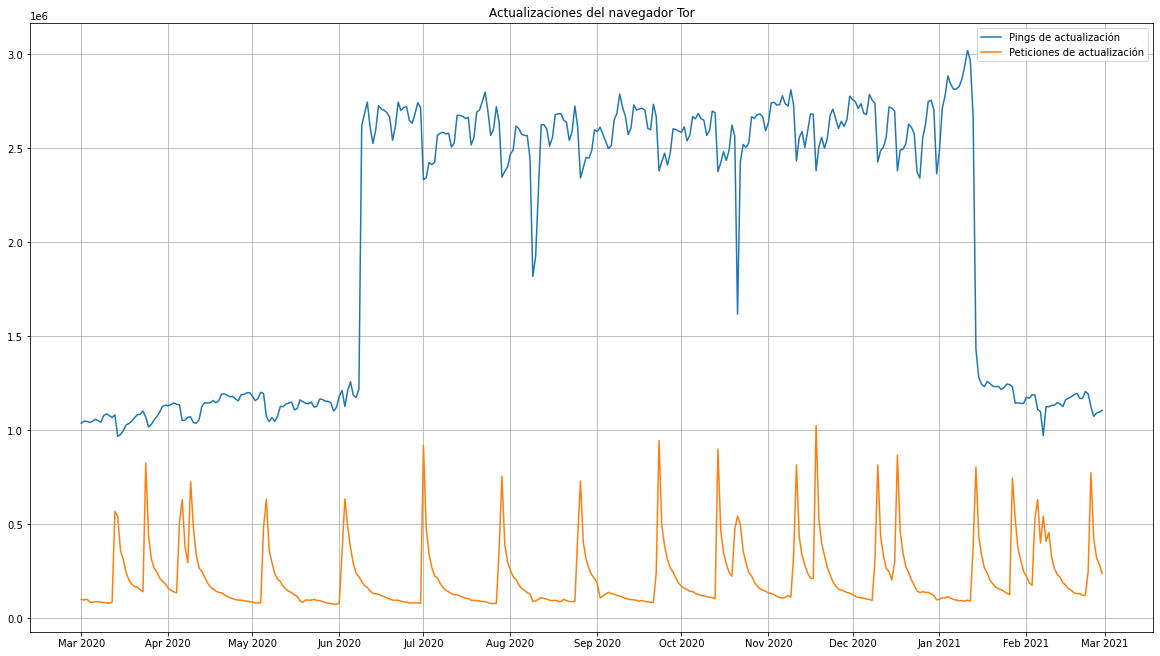

In [116]:
source = 'tor_browser_updates_and_downloads'
dataframes[source] = pd.read_csv(data_dir / csv.get(source))
df = dataframes[source]

df['date'] = df['date'].astype('M')

y = {
    'Descargas del navegador': 'initial_downloads',
    'Descargas de la firma': 'signature_downloads'
}
plot(data=df, x='date', y=y, title='Descargas del navegador Tor', path=f'plots/tor_browser_downloads.png')

y = {
    'Pings de actualización': 'update_pings',
    'Peticiones de actualización': 'update_requests'
}
plot(data=df, x='date', y=y, title='Actualizaciones del navegador Tor', path=f'plots/tor_browser_updates.png')

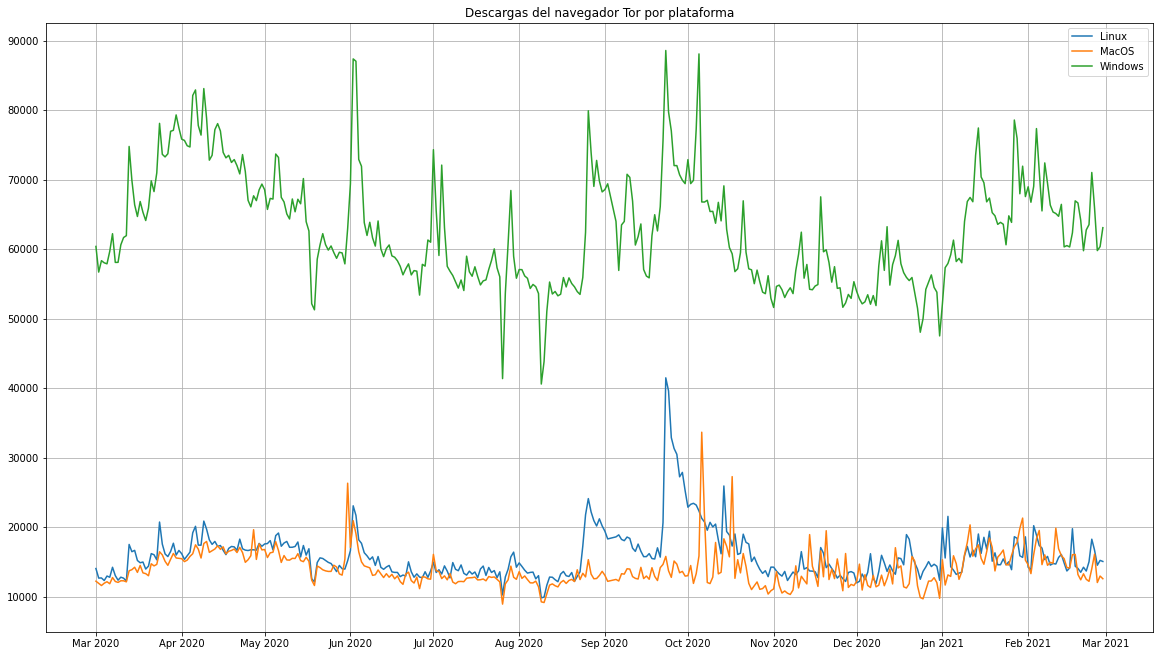

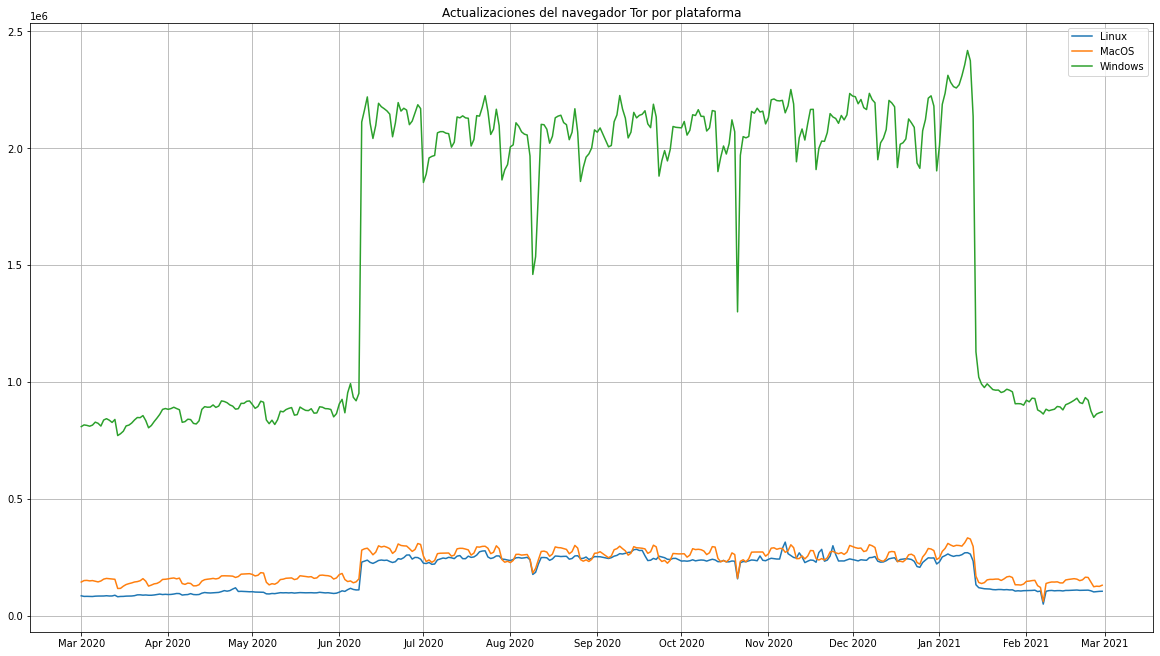

In [115]:
source = 'tor_browser_upd_and_dl_by_platform'
dataframes[source] = pd.read_csv(data_dir / csv.get(source))
df = dataframes[source]

df['date'] = df['date'].astype('M')
df['platform'] = df['platform'].astype('category').cat.rename_categories({'l': 'Linux', 'm': 'MacOS', 'w': 'Windows'})


plot(data=df, x='date', y='initial_downloads', by='platform', title='Descargas del navegador Tor por plataforma', path=f'plots/tor_browser_downloads_by_platform.png')
plot(data=df, x='date', y='update_pings', by='platform', title='Actualizaciones del navegador Tor por plataforma', path=f'plots/tor_browser_updates_by_platform.png')